<a href="https://colab.research.google.com/github/paramKeswani/LSTM-MODEL-STOCK-PREDICTION/blob/main/HDFC_Linear_Regresssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/HDFCBANK.NS.csv")

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-01,1081.400024,1087.500000,1029.125000,1030.599976,994.456116,102832700
1,2018-09-01,1034.699951,1039.474976,955.099976,1003.025024,967.848267,110860266
2,2018-10-01,1004.900024,1026.099976,942.500000,955.875000,922.351868,165463186
3,2018-11-01,965.000000,1068.775024,948.000000,1064.224976,1026.901855,137555020
4,2018-12-01,1065.500000,1079.699951,1016.000000,1060.849976,1023.645203,94995760


In [ ]:
dataset["Date"] = pd.to_datetime(dataset.Date)

In [ ]:
dataset.shape

(60, 7)

In [ ]:
dataset.drop("Adj Close",axis=1,inplace =True)

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2018-08-01,1081.400024,1087.500000,1029.125000,1030.599976,102832700
1,2018-09-01,1034.699951,1039.474976,955.099976,1003.025024,110860266
2,2018-10-01,1004.900024,1026.099976,942.500000,955.875000,165463186
3,2018-11-01,965.000000,1068.775024,948.000000,1064.224976,137555020
4,2018-12-01,1065.500000,1079.699951,1016.000000,1060.849976,94995760


In [ ]:
dataset.isnull().sum()

NameError: ignored

In [ ]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    60 non-null     datetime64[ns]
 1   Open    60 non-null     float64       
 2   High    60 non-null     float64       
 3   Low     60 non-null     float64       
 4   Close   60 non-null     float64       
 5   Volume  60 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 2.9 KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Volume
count,60.000000,60.000000,60.000000,60.000000,6.000000e+01
mean,1323.835829,1394.938748,1257.938333,1330.816660,1.923259e+08
std,225.236325,233.882527,229.592549,227.712587,9.768083e+07
min,863.849976,1001.799988,738.750000,861.900024,8.629722e+07
25%,1114.406281,1165.506256,1061.500031,1123.331207,1.281073e+08
50%,1371.025024,1443.799988,1285.150024,1389.724976,1.513259e+08
75%,1502.375000,1587.512482,1419.324982,1496.999969,2.272946e+08
max,1712.500000,1757.500000,1627.150024,1701.400024,4.731258e+08


<Axes: >

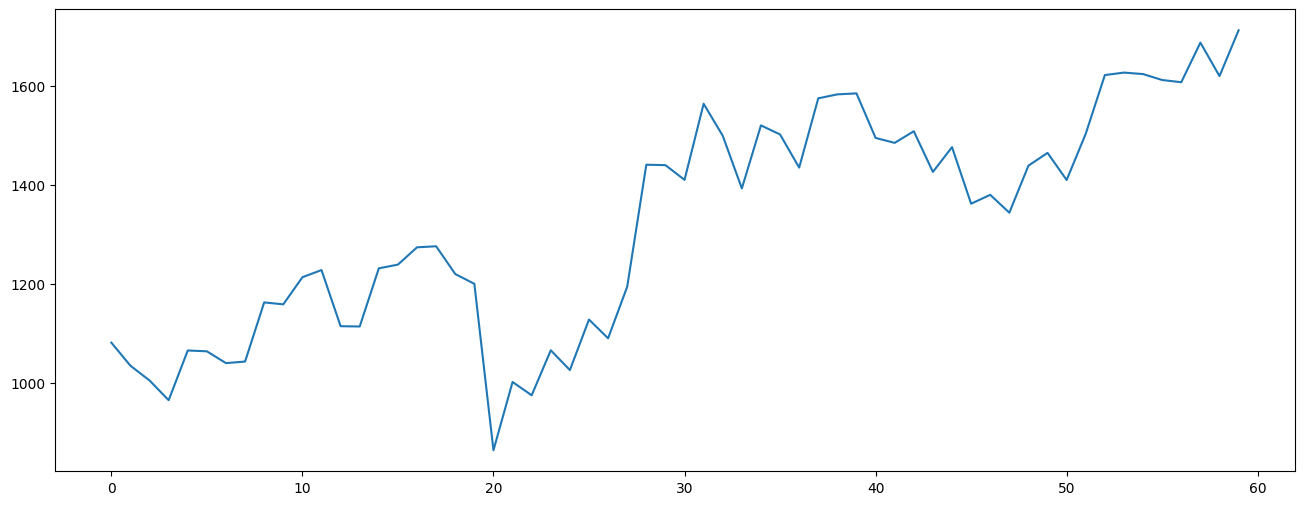

In [ ]:
dataset["Open"].plot(figsize=(16,6))

In [ ]:
X = dataset[["Open","High","Low","Volume"]]
y = dataset["Close"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test =train_test_split(X,y,test_size= 0.7,random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
from  sklearn.metrics import confusion_matrix,accuracy_score
regressor =LinearRegression()


In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
predicted = regressor.predict(X_test)

NameError: ignored

In [ ]:
dataframe_p = pd.DataFrame({"Actusl " :y_test,"Predicted Price":predicted})

In [ ]:
print(dataframe_p)

        Actusl   Predicted Price
26  1183.550049      1176.764645
35  1426.449951      1460.199820
59  1690.699951      1688.075696
28  1436.300049      1398.997583
11  1125.824951      1173.476552
2    955.875000      1005.290073
34  1497.900024      1496.967512
58  1701.400024      1640.591265
40  1479.400024      1470.122110
22  1065.849976      1022.977727
4   1060.849976      1070.484496
10  1221.875000      1251.508831
30  1534.400024      1491.197287
41  1485.699951      1496.422059
33  1515.849976      1444.987640
43  1470.349976      1368.344294
49  1421.349976      1429.340785
7   1159.449951      1110.177523
14  1230.349976      1236.717842
32  1412.300049      1411.059604
50  1496.699951      1441.937019
29  1390.500000      1408.617469
42  1426.250000      1460.025597
54  1599.599976      1625.605587
18  1177.650024      1227.242156
56  1687.599976      1666.411738
27  1440.849976      1286.113386
15  1274.949951      1280.329945
5   1039.974976      1067.780082
31  1493.6

In [ ]:
dataframe_p.head(60)

,Actusl,Predicted Price
26,1183.550049,1176.764645
35,1426.449951,1460.199820
59,1690.699951,1688.075696
28,1436.300049,1398.997583
11,1125.824951,1173.476552
2,955.875000,1005.290073
34,1497.900024,1496.967512
58,1701.400024,1640.591265
40,1479.400024,1470.122110
22,1065.849976,1022.977727


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
regressor.score(X_test,y_test)

0.9507848921042905

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, predicted)

In [ ]:
print(f"Accuracy :{r2}")

Accuracy :0.9507848921042905


In [ ]:
mse = mean_squared_error(y_test, predicted)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2078.80884941873
